# MNIST Handwritten Digit Recognition in PyTorch

In [1]:
import torch
import torchvision

In [3]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = True
torch.manual_seed(random_seed)

## Preparing the Dataset

In [4]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [5]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [6]:
example_data.shape

torch.Size([1000, 1, 28, 28])

In [7]:
example_data.view(example_data.shape[0], -1).shape

torch.Size([1000, 784])

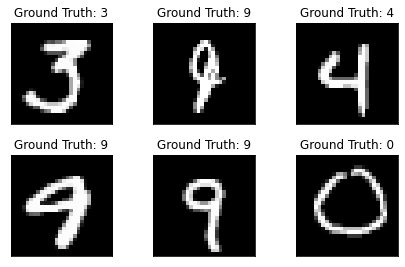

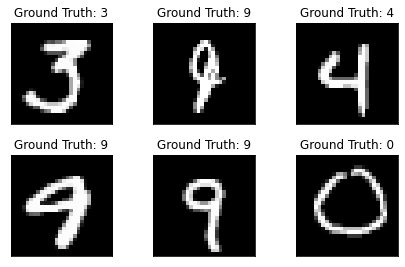

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

## Building the Network

In [12]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

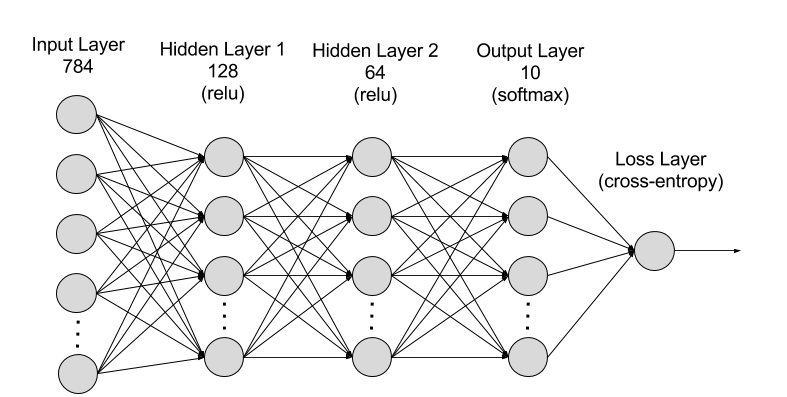

In [13]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
#         x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
#         x = F.dropout(x, training=self.training)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

In [17]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

## Training the Model

In [18]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [19]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    
    # Flatten MNIST images into a 784 long vector
    data = data.view(data.shape[0], -1)
    
    output = network(data)
    
    loss = F.nll_loss(output, target)
    
    loss.backward()
    optimizer.step()

    
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), 'model.pth')
      torch.save(optimizer.state_dict(), 'optimizer.pth')

In [20]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data = data.view(data.shape[0], -1)
      output = network(data)
        
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [21]:
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.2916, Accuracy: 1514/10000 (15%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302778
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.256666
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.200725
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.146416
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.076212
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.956652
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.829226
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.661494
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.419401
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.353627
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.224201
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.010052
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.898334
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.803301
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.798473
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.911240
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.728284
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.593429
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.651901
Train Epoch: 1 [12160

Train Epoch: 2 [44160/60000 (74%)]	Loss: 0.350438
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.252726
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.108009
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.246829
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.075503
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.337102
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.335630
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.136916
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.181594
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.296473
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.173210
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.175666
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.418155
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.276972
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.169404
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.459806
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.205352
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.281751
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.124089
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.132816


## Evaluating the Model's Performance

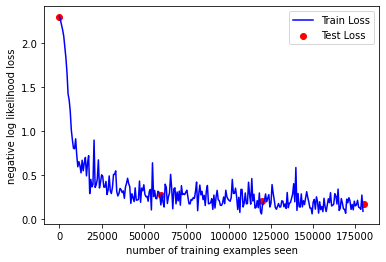

In [22]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.show()

In [24]:
with torch.no_grad():
  example_data = example_data.view(example_data.shape[0], -1)
  output = network(example_data)

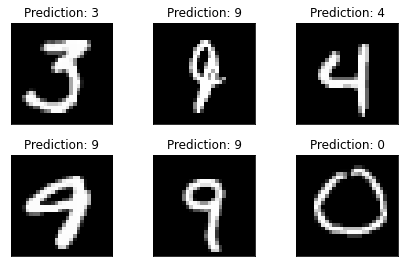

In [25]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])

## Continued Training from Checkpoints

In [26]:
continued_network = Net()
continued_optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                                momentum=momentum)

In [28]:
network_state_dict = torch.load('model.pth')
continued_network.load_state_dict(network_state_dict)

optimizer_state_dict = torch.load('optimizer.pth')
continued_optimizer.load_state_dict(optimizer_state_dict)

In [29]:
for i in range(4,9):
  test_counter.append(i*len(train_loader.dataset))
  train(i)
  test()


Train Epoch: 4 [0/60000 (0%)]	Loss: 0.215017
Train Epoch: 4 [640/60000 (1%)]	Loss: 0.072547
Train Epoch: 4 [1280/60000 (2%)]	Loss: 0.149357
Train Epoch: 4 [1920/60000 (3%)]	Loss: 0.160089
Train Epoch: 4 [2560/60000 (4%)]	Loss: 0.099552
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.198655
Train Epoch: 4 [3840/60000 (6%)]	Loss: 0.123374
Train Epoch: 4 [4480/60000 (7%)]	Loss: 0.136346
Train Epoch: 4 [5120/60000 (9%)]	Loss: 0.075877
Train Epoch: 4 [5760/60000 (10%)]	Loss: 0.081896
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.279065
Train Epoch: 4 [7040/60000 (12%)]	Loss: 0.121069
Train Epoch: 4 [7680/60000 (13%)]	Loss: 0.099547
Train Epoch: 4 [8320/60000 (14%)]	Loss: 0.336755
Train Epoch: 4 [8960/60000 (15%)]	Loss: 0.132753
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.247478
Train Epoch: 4 [10240/60000 (17%)]	Loss: 0.229313
Train Epoch: 4 [10880/60000 (18%)]	Loss: 0.086000
Train Epoch: 4 [11520/60000 (19%)]	Loss: 0.060430
Train Epoch: 4 [12160/60000 (20%)]	Loss: 0.298396
Train Epoch: 4 [12800/60000 (

Train Epoch: 5 [45440/60000 (76%)]	Loss: 0.183793
Train Epoch: 5 [46080/60000 (77%)]	Loss: 0.060206
Train Epoch: 5 [46720/60000 (78%)]	Loss: 0.181481
Train Epoch: 5 [47360/60000 (79%)]	Loss: 0.220050
Train Epoch: 5 [48000/60000 (80%)]	Loss: 0.274100
Train Epoch: 5 [48640/60000 (81%)]	Loss: 0.114585
Train Epoch: 5 [49280/60000 (82%)]	Loss: 0.150978
Train Epoch: 5 [49920/60000 (83%)]	Loss: 0.128421
Train Epoch: 5 [50560/60000 (84%)]	Loss: 0.126062
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.123927
Train Epoch: 5 [51840/60000 (86%)]	Loss: 0.091417
Train Epoch: 5 [52480/60000 (87%)]	Loss: 0.170638
Train Epoch: 5 [53120/60000 (88%)]	Loss: 0.131754
Train Epoch: 5 [53760/60000 (90%)]	Loss: 0.032056
Train Epoch: 5 [54400/60000 (91%)]	Loss: 0.128338
Train Epoch: 5 [55040/60000 (92%)]	Loss: 0.130120
Train Epoch: 5 [55680/60000 (93%)]	Loss: 0.022533
Train Epoch: 5 [56320/60000 (94%)]	Loss: 0.113364
Train Epoch: 5 [56960/60000 (95%)]	Loss: 0.245021
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.143305


Train Epoch: 7 [29440/60000 (49%)]	Loss: 0.110763
Train Epoch: 7 [30080/60000 (50%)]	Loss: 0.031931
Train Epoch: 7 [30720/60000 (51%)]	Loss: 0.105580
Train Epoch: 7 [31360/60000 (52%)]	Loss: 0.080953
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.103132
Train Epoch: 7 [32640/60000 (54%)]	Loss: 0.112004
Train Epoch: 7 [33280/60000 (55%)]	Loss: 0.101901
Train Epoch: 7 [33920/60000 (57%)]	Loss: 0.170692
Train Epoch: 7 [34560/60000 (58%)]	Loss: 0.031882
Train Epoch: 7 [35200/60000 (59%)]	Loss: 0.085593
Train Epoch: 7 [35840/60000 (60%)]	Loss: 0.042800
Train Epoch: 7 [36480/60000 (61%)]	Loss: 0.222181
Train Epoch: 7 [37120/60000 (62%)]	Loss: 0.065020
Train Epoch: 7 [37760/60000 (63%)]	Loss: 0.061377
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.063933
Train Epoch: 7 [39040/60000 (65%)]	Loss: 0.134512
Train Epoch: 7 [39680/60000 (66%)]	Loss: 0.028576
Train Epoch: 7 [40320/60000 (67%)]	Loss: 0.066739
Train Epoch: 7 [40960/60000 (68%)]	Loss: 0.247965
Train Epoch: 7 [41600/60000 (69%)]	Loss: 0.183397


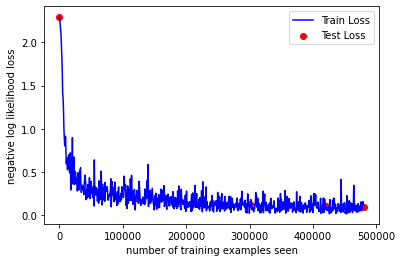

In [30]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.show()

# Auto Encoder: AEs for occlusion

In [31]:
import copy
import numpy as np

In [32]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=20000, shuffle=True)

In [33]:
examples = enumerate(train_loader)
batch_idx, (data, targets) = next(examples)

In [34]:
data.shape

torch.Size([20000, 1, 28, 28])

In [35]:
data = np.array(data.view(data.shape[0], -1))

In [36]:
data.shape

(20000, 784)

In [37]:
# normalize the data to a range of [0 1]
dataNorm = data / np.max(data)

# convert to tensor
data = torch.tensor( dataNorm ).float()

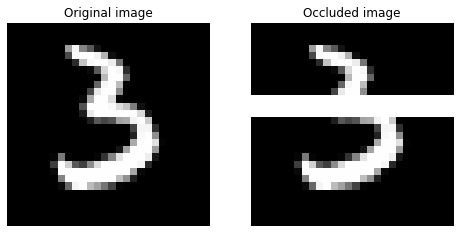

In [38]:
# reconstruct a sample as an image

img = data[12345,:].view(28,28)


occluded = copy.deepcopy( img )
occluded[10:13,:] = 1

fig,ax = plt.subplots(1,2,figsize=(8,5))

ax[0].imshow(img,cmap='gray')
ax[0].set_title('Original image')
ax[0].axis('off')

ax[1].imshow(occluded,cmap='gray')
ax[1].set_title('Occluded image')
ax[1].axis('off')

plt.show()

In [41]:
# create a class for the model
def createTheMNISTAE():

  class aenet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(784,128)
      ### encoder layer
      self.enc = nn.Linear(128,50)
      ### latent layer
      self.lat = nn.Linear(50,128)
      ### decoder layer
      self.dec = nn.Linear(128,784)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.enc(x) )
      x = F.relu( self.lat(x) )
      y = torch.sigmoid( self.dec(x) )
      return y
  
  # create the model instance
  net = aenet()
  
  # loss function
  lossfun = nn.MSELoss()

  # optimizer
  optimizer = torch.optim.Adam(net.parameters(),lr=.001)

  return net,lossfun,optimizer

In [42]:
def function2trainTheModel():

  # number of epochs
  numepochs = 5
  
  # create a new model
  net,lossfun,optimizer = createTheMNISTAE()

  # initialize losses
  losses = []

  # batch size and number of batches
  batchsize  = 32
  numBatches = int(data.shape[0]/batchsize)


  # loop over epochs (now each epoch goes through all samples)
  for epochi in range(numepochs):

    
    # get a permuted index vector
    randidx = np.random.permutation(data.shape[0]).astype(int)
    
    for batchi in range(numBatches):
      
      # samples to use in this batch
      samps2use = range((batchi-1)*batchsize,batchi*batchsize)
      

      # select those images
      X = data[randidx[samps2use],:]

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,X)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    
      # losses in this batch
      losses.append( loss.item() )

  # end epochs
  
  # function output
  return losses,net

Final loss: 0.0358


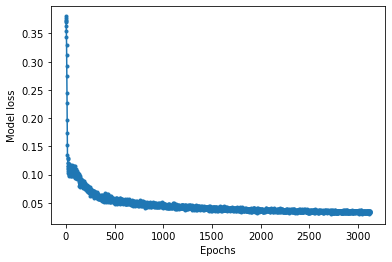

In [43]:
# train the model (16s)
losses,net = function2trainTheModel()
print(f'Final loss: {losses[-1]:.4f}')

# visualize the losses
plt.plot(losses,'.-')
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.show()

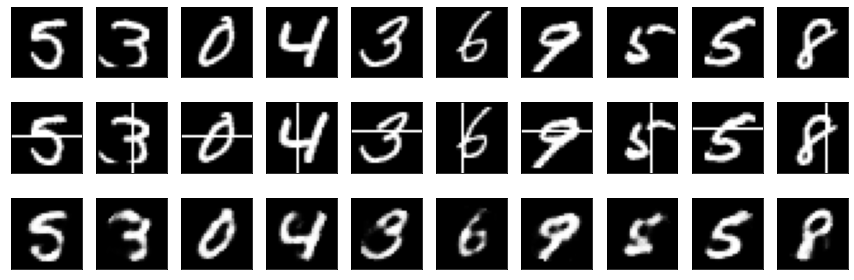

In [45]:
# grab a small set of images
X = copy.deepcopy( data[:10,:] )

# add noise
for i in range(X.shape[0]):
  
  # reshape the image
  img = X[i,:].view(28,28)

  # occlude random rows or columns
  startloc = np.random.choice(range(10,21))
  if i%2==0: # even -> horizontal occlusion
    img[startloc:startloc+1,:] = 1
  else:      # odd -> vertical occlusion
    img[:,startloc:startloc+1] = 1



# run the samples through the model
deOccluded = net(X)


# show the noisy images
fig,axs = plt.subplots(3,10,figsize=(15,5))

for i in range(10):
  axs[0,i].imshow(data[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[2,i].imshow(deOccluded[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  axs[2,i].set_xticks([]), axs[2,i].set_yticks([])
  
plt.show()

# CNN Model

In [54]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [55]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [56]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [57]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [58]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [59]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), 'model.pth')
      torch.save(optimizer.state_dict(), 'optimizer.pth')

In [60]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [61]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()


Test set: Avg. loss: 2.3063, Accuracy: 987/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.291231
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.305116
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.274842
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.281066
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.250931
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.265216
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.192611
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.231754
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.159925
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.162525
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.165556
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.076900
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.989143
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.953634
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.800702
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.671822
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.875151
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.592331
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.524523
Train Epoch: 1 [12160/

Train Epoch: 2 [44160/60000 (74%)]	Loss: 0.241762
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.251885
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.470278
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.186827
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.536418
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.298072
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.336433
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.321828
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.320592
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.352482
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.255759
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.325149
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.394615
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.388283
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.400996
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.340640
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.493621
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.425937
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.337344
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.399831
